In [ ]:
# https://towardsdatascience.com/meet-bertopic-berts-cousin-for-advanced-topic-modeling-ea5bf0b7faa3
%%capture
!pip install bertopic

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import json
#uploaded = files.upload()
#with open("uploaded", "r", encoding="utf-8") as f:
  #docs= json.load(f)["headline_text"]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/My Drive/TIME1/pant1.csv". #tweets-from:partidomorenamx.csv" .


Mounted at /content/drive
cp: missing destination file operand after '/content/drive/My Drive/TIME1/pant1.csv.'
Try 'cp --help' for more information.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_url = "/content/drive/My Drive/mediacloudbrozot3.csv"
data = pd.read_csv(data_url)

<ipython-input-5-965cc0ec5fbe>:2: DtypeWarning: Columns (5,7,8,15,16,21,22,26,28,29,30,31,32,33,35,37,38,39,41,42,43,44,49,52,53,58,59,75,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_url)


In [ ]:
data

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,edit_history_tweet_ids,edit_controls.edits_remaining,edit_controls.editable_until,edit_controls.is_edit_eligible,author_id,...,geo.geo.bbox,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,matching_rules,__twarc.retrieved_at,__twarc.url,__twarc.version
0,1.011747e+18,1.011747e+18,NaN,NaN,NaN,"[""1011746854030233600""]",5.0,2018-06-26T23:33:42.000Z,True,107120856.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-13T01:57:39+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.12.0
1,1.011745e+18,1.011745e+18,NaN,NaN,NaN,"[""1011744678935519233""]",5.0,2018-06-26T23:25:03.000Z,True,107120856.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-13T01:57:39+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.12.0
2,1.011723e+18,1.011723e+18,NaN,NaN,NaN,"[""1011723302111457280""]",5.0,2018-06-26T22:00:06.000Z,True,107120856.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-13T01:57:39+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.12.0
3,1.011678e+18,1.011678e+18,NaN,NaN,NaN,"[""1011678026579562496""]",5.0,2018-06-26T19:00:12.000Z,True,107120856.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-13T01:57:39+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.12.0
4,1.011655e+18,1.011655e+18,NaN,NaN,NaN,"[""1011655398426898432""]",5.0,2018-06-26T17:30:17.000Z,True,107120856.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-13T01:57:39+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data['text']

0        Noticia Cultura:  | ¬øA qu√© le tiras mexicano...
1        AMLO dice que la peor plaga son los pol√≠ticos...
2             Anaya comparte n√∫mero de WhatsApp en debate
3        Cosas de la ciudad: Ya son varios d√≠as que ve...
4        Miente Anaya al afirmar que mueren 60 mil pers...
                               ...                        
22498             AMLO no dio dinero a damnificados: Meade
22499             AMLO no dio dinero a damnificados: Meade
22500             AMLO no dio dinero a damnificados: Meade
22501    ‚ÄúANDRES MANUEL, VAS A VOLVER A PERDER ‚Äú: M...
22502    El 'verdadero pacto' est√° entre Anaya y Pe√±a...
Name: text, Length: 22503, dtype: object

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt') # download the punkt tokenizer if you haven't done it before

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re

# Sample DataFrame with a 'text' column
#df = pd.DataFrame({'text': ['Check out this cool website: https://www.example.com/abc123', 'Another URL: www.example.org']})
df = pd.read_csv(data_url) #('example_dataset.csv')

# Define the regular expression pattern to match URLs
url_pattern = re.compile(r"(https?://\S+|www\.\S+)")

# Apply the sub() function to the 'text' column
df['text'] = df['text'].apply(lambda x: url_pattern.sub('', x))
df['text'] = df['text'].str.replace(r'@\w+', '').str.replace(r'http\S+', '').str.replace(r'[^a-zA-Z\s]', '').str.strip()
# Print the result
#print(df)

<ipython-input-9-42f7c54f4064>:5: DtypeWarning: Columns (5,7,8,15,16,21,22,26,28,29,30,31,32,33,35,37,38,39,41,42,43,44,49,52,53,58,59,75,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url) #('example_dataset.csv')


In [ ]:
# Load the dataset
#df = pd.read_csv(data_url) #('example_dataset.csv')

# Extract the column you want to tokenize
text_column = df['text']

# Tokenize the text column
tokens = text_column.apply(nltk.word_tokenize)

# Print the resulting tokens
print(tokens)

0        [Noticia, Cultura, :, |, ¬øA, qu√©, le, tiras,...
1        [AMLO, dice, que, la, peor, plaga, son, los, p...
2        [Anaya, comparte, n√∫mero, de, WhatsApp, en, d...
3        [Cosas, de, la, ciudad, :, Ya, son, varios, d√...
4        [Miente, Anaya, al, afirmar, que, mueren, 60, ...
                               ...                        
22498    [AMLO, no, dio, dinero, a, damnificados, :, Me...
22499    [AMLO, no, dio, dinero, a, damnificados, :, Me...
22500    [AMLO, no, dio, dinero, a, damnificados, :, Me...
22501    [‚ÄúANDRES, MANUEL, ,, VAS, A, VOLVER, A, PERD...
22502    [El, 'verdadero, pacto, ', est√°, entre, Anaya...
Name: text, Length: 22503, dtype: object


In [ ]:
text_column = text_column.str.lower()
print(text_column)

0        noticia cultura:  | ¬øa qu√© le tiras mexicano...
1        amlo dice que la peor plaga son los pol√≠ticos...
2             anaya comparte n√∫mero de whatsapp en debate
3        cosas de la ciudad: ya son varios d√≠as que ve...
4        miente anaya al afirmar que mueren 60 mil pers...
                               ...                        
22498             amlo no dio dinero a damnificados: meade
22499             amlo no dio dinero a damnificados: meade
22500             amlo no dio dinero a damnificados: meade
22501    ‚äúandres manuel, vas a volver a perder ‚äú: m...
22502    el 'verdadero pacto' est√° entre anaya y pe√±a...
Name: text, Length: 22503, dtype: object


In [ ]:
import numpy as np
text_column = text_column.replace(np.nan, '')
#df['text'] = df['text'].replace(np.nan, '')
print(text_column)

0        noticia cultura:  | ¬øa qu√© le tiras mexicano...
1        amlo dice que la peor plaga son los pol√≠ticos...
2             anaya comparte n√∫mero de whatsapp en debate
3        cosas de la ciudad: ya son varios d√≠as que ve...
4        miente anaya al afirmar que mueren 60 mil pers...
                               ...                        
22498             amlo no dio dinero a damnificados: meade
22499             amlo no dio dinero a damnificados: meade
22500             amlo no dio dinero a damnificados: meade
22501    ‚äúandres manuel vas a volver a perder ‚äú: me...
22502    el 'verdadero pacto' est√° entre anaya y pe√±a...
Name: text, Length: 22503, dtype: object


In [ ]:
text_column = text_column.fillna('').apply(str)
print(text_column)

0        noticia cultura:  | ¬øa qu√© le tiras mexicano...
1        amlo dice que la peor plaga son los pol√≠ticos...
2             anaya comparte n√∫mero de whatsapp en debate
3        cosas de la ciudad: ya son varios d√≠as que ve...
4        miente anaya al afirmar que mueren 60 mil pers...
                               ...                        
22498             amlo no dio dinero a damnificados: meade
22499             amlo no dio dinero a damnificados: meade
22500             amlo no dio dinero a damnificados: meade
22501    ‚äúandres manuel vas a volver a perder ‚äú: me...
22502    el 'verdadero pacto' est√° entre anaya y pe√±a...
Name: text, Length: 22503, dtype: object


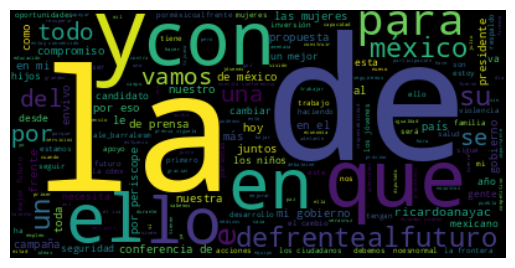

In [ ]:
#Library to form wordcloud :
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "".join(text_column)
#Generating the wordcloud :
wordcloud = WordCloud().generate(text)

#To remove the axis value :
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('spanish')
text_column = text_column.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Stopwords in English
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
text_column = text_column.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(text_column)

0          noticia cultura: | ¬øa qu√© tiras mexicano xxix
1                amlo dice peor plaga pol√≠ticos corruptos
2                   anaya comparte n√∫mero whatsapp debate
3        cosas ciudad: varios d√≠as vecinos san sebasti...
4        miente anaya afirmar mueren 60 mil personas eu...
                               ...                        
22498                  amlo dio dinero damnificados: meade
22499                  amlo dio dinero damnificados: meade
22500                  amlo dio dinero damnificados: meade
22501    ‚andres manuel vas volver perder ‚: meade kuri...
22502            'verdadero pacto' est√° anaya pe√±a: amlo
Name: text, Length: 22503, dtype: object


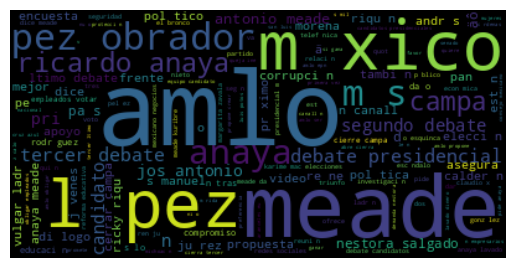

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "".join(text_column)
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "".join(text_column)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axes for better visualization
plt.show()

In [ ]:
from bertopic import BERTopic

model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2') #, min_topic_size= 2  #Lo cambie a 10
headline_topics, _ = model.fit_transform(text_column) #I changed to data.text

Batches:   0%|          | 0/704 [00:00<?, ?it/s]

2023-07-04 02:15:41,838 - BERTopic - Transformed documents to Embeddings
2023-07-04 02:16:33,822 - BERTopic - Reduced dimensionality
2023-07-04 02:16:40,048 - BERTopic - Clustered reduced embeddings


In [ ]:
headline_topics

[-1,
 0,
 -1,
 -1,
 203,
 -1,
 150,
 34,
 -1,
 2,
 581,
 46,
 -1,
 581,
 581,
 48,
 65,
 34,
 512,
 512,
 512,
 512,
 512,
 512,
 512,
 -1,
 512,
 222,
 -1,
 257,
 188,
 34,
 581,
 9,
 19,
 19,
 337,
 376,
 -1,
 34,
 -1,
 -1,
 222,
 493,
 40,
 -1,
 71,
 71,
 -1,
 -1,
 581,
 257,
 71,
 257,
 7,
 -1,
 -1,
 -1,
 71,
 -1,
 71,
 -1,
 195,
 52,
 78,
 48,
 -1,
 -1,
 1,
 -1,
 -1,
 71,
 -1,
 -1,
 128,
 34,
 -1,
 -1,
 195,
 126,
 456,
 -1,
 -1,
 627,
 543,
 543,
 543,
 543,
 -1,
 1,
 -1,
 102,
 13,
 -1,
 -1,
 195,
 -1,
 543,
 543,
 543,
 543,
 543,
 543,
 543,
 543,
 543,
 6,
 -1,
 -1,
 -1,
 54,
 71,
 195,
 195,
 107,
 -1,
 1,
 54,
 -1,
 172,
 71,
 457,
 19,
 19,
 74,
 372,
 1,
 -1,
 577,
 54,
 292,
 -1,
 54,
 343,
 32,
 68,
 -1,
 -1,
 -1,
 269,
 598,
 23,
 197,
 0,
 528,
 1,
 1,
 -1,
 16,
 76,
 -1,
 320,
 1,
 1,
 148,
 165,
 1,
 412,
 412,
 195,
 0,
 -1,
 9,
 18,
 10,
 257,
 102,
 109,
 527,
 527,
 527,
 527,
 527,
 527,
 527,
 527,
 527,
 527,
 527,
 527,
 102,
 -1,
 116,
 29,
 71,
 1,
 1,
 -1

In [ ]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 658


,Topic,Count,Name,Representation,Representative_Docs
0,-1,5884,-1_pr_encuesta_candidatos_pur,"[pr, encuesta, candidatos, pur, lanzan, nacion...",[denuncia pan l√≥pez obrador jos√© antonio mea...
1,0,261,0_pol_tica_tico_ticos,"[pol, tica, tico, ticos, ticas, polic, confide...",[pol√≠tica confidencial: anaya ausencia medi√°...
2,1,184,1_segundo_debate_formato_presidencial,"[segundo, debate, formato, presidencial, debat...","[segundo debate, segundo debate presidencial, ..."
3,2,149,2_pacto_impunidad_hago_epn,"[pacto, impunidad, hago, epn, pactos, corral, ...","[nuevo pacto impunidad, pacto impunidad, pacto..."
4,3,142,3_tercer_presidencial_debate_rida,"[tercer, presidencial, debate, rida, sorteo, r...","[tercer debate presidencial, tercer debate pre..."


In [ ]:
vectorizer_model = text_column
topic_model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 100) #
#BERTopic(embedding_model="vinai/bertweet-base", vectorizer_model=vectorizer_model,low_memory=True,calculate_probabilities=True,verbose=True, n_gram_range=(1, 3))
#model.fit_transform(tweet_list)
tweet_list = text_column.tolist()
def get_bert_topics(topic_model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words=topic_model.get_topic(i)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)
topics, probs = topic_model.fit_transform(tweet_list)

get_bert_topics (topic_model, len(set(topics))-1)

Batches:   0%|          | 0/704 [00:00<?, ?it/s]

2023-07-04 02:17:12,097 - BERTopic - Transformed documents to Embeddings
2023-07-04 02:17:40,600 - BERTopic - Reduced dimensionality
2023-07-04 02:17:43,501 - BERTopic - Clustered reduced embeddings


,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 15,Topic # 16,Topic # 17,Topic # 18,Topic # 19,Topic # 20,Topic # 21,Topic # 22,Topic # 23,Topic # 24
0,candidatos,meade,debate,nestora,electoral,campa,opini,pol,video,gana,...,azul,obrador,pacto,seguridad,øy,veracruz,ventaja,ortiz,cdmx,mayor
1,candidato,jos,tercer,salgado,electorales,azteca,educaci,tica,lavado,ganar,...,cruz,pez,impunidad,estrategia,qui,puebla,encuesta,guerrero,calo,mayores
2,presidenciales,antonio,presidencial,meade,proceso,margarita,elecci,tico,dinero,si,...,mx,andr,pe,cambiar,voto,internacionales,puntos,paolo,cierre,adultos
3,candidatum,seguridad,segundo,demanda,yunes,estadio,jeric,ticos,anaya,elecci,...,liga,manuel,epn,prioridad,øel,observadores,lidera,asesinado,fox,pensiones
4,equipo,anaya,ltimo,retracto,karime,cerrar,le,ticas,denuncia,presidencia,...,jugador,canci,oscurito,servicios,vale,nepotismo,preferencias,hermano,recibe,casas
5,debate,xico,propuestas,problema,orden,cierre,as,polic,cordero,amlo,...,aguilar,yoteamlo,amlo,empleo,nde,traer,amlo,levy,aeropuerto,adulto
6,candidatura,vulgar,rida,desechan,mac,zavala,garc,agenda,pgr,pri,...,oficial,empresarios,hago,calidad,ndum,evitar,coparmex,per,euforia,duplicar
7,ciudadanos,ladr,previo,ofrezco,as,as,nica,violencia,barreiro,gan,...,pablo,mentiroso,pactos,salud,memor,amlo,reforma,guillermo,gritos,crear
8,piden,pepe,yucat,moral,fraude,amlo,impulsar,politico,ataque,santos,...,refuerzos,perredistas,nieto,anaya,est,esposa,50,abordado,cede,pensi
9,candidata,amlo,insultos,spot,aprehensi,anaya,amlo,exterior,orquestado,asegura,...,apertura,oraci,anaya,diferentes,øqui,duarte,da,activista,campa,propone


In [ ]:
get_bert_topics (topic_model, len(set(topics))-1)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 19,Topic # 20,Topic # 21,Topic # 22,Topic # 23,Topic # 24,Topic # 25,Topic # 26,Topic # 27,Topic # 28
0,candidatos,meade,xico,debate,margarita,anaya,gana,electoral,campa,pol,...,cambios,empresarios,lavado,guerra,aeropuerto,estudiantes,campa,chihuahua,puntos,migrantes
1,candidato,antonio,amnist,segundo,zavala,seguridad,ganar,electorales,as,tica,...,cambio,amlo,dinero,sucia,nuevo,tec,meade,bancomer,ventaja,trump
2,candidatura,jos,opini,presidencial,renuncia,ricardo,si,proceso,campeche,tico,...,perfilan,controversia,europa,denuncias,concesionar,asunto,fortalecer,bbva,encuesta,animales
3,morena,mujeres,amlo,primer,invita,llama,amlo,contienda,arrancan,polic,...,ocupar,respetuosos,investigan,atiende,construcci,jalisco,relanza,anderson,amlo,tuitazos
4,presidenciales,ganar,est,tijuana,unirse,llamado,dice,violencia,gubernatura,ticos,...,dirigencia,zafo,red,financiando,termine,buena,antonio,corral,venta,llamar
5,guanajuato,asegura,os,gan,anaya,amlo,coci,preferencia,campe,confidencial,...,pri,adversarios,espa,mi,politizar,gobernar,cisneros,15,arriba,caravana
6,debate,muro,elecci,sociales,contienda,empleo,arroz,contraste,alcald,ticas,...,sexenio,pleito,anaya,amlo,viable,cine,jos,cronista,20,rurales
7,presidencial,pri,corrupci,anaya,valiente,promete,el,observador,arranca,ticoricardo,...,reformadores,rete,ol,contrarrestar,propuesta,gente,ju,yorker,anaya,forman
8,zavala,xico,pa,previo,mujer,ser,quot,ideas,cuatro,itinerario,...,mitad,imcp,presunto,empresarios,con8230,asesinato,rez,consejeros,seg,cruza
9,coalici,apoyo,noticia,redes,reconoce,propuestas,elecciones,oea,ricardo,cr,...,ren,enredados,acusaci,ine,debe,eugenio,equipo,reunir,sondeo,öltimo


In [ ]:
model.visualize_barchart(top_n_topics=15)

In [ ]:
model.visualize_topics()

In [ ]:
model.visualize_hierarchy(top_n_topics=30)

In [ ]:
# Select most 3 similar topics
similar_topics, similarity = model.find_topics("politics", top_n = 3)
similar_topics

[37, 81, 13]

In [ ]:
most_similar = similar_topics[0]
print("Most Similar Topic Info: \n{}".format(model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0]))

Most Similar Topic Info: 
[('electoral', 0.12171703596539256), ('electorales', 0.09681619415542814), ('oea_oficial', 0.06290939829504046), ('tribunal', 0.06290939829504046), ('extranjeros', 0.06290939829504046), ('aportaciones', 0.06290939829504046), ('visitantes', 0.06290939829504046), ('procesos', 0.05752862784055006), ('misión', 0.05752862784055006), ('mzavalagc', 0.05079449173044646)]
Similarity Score: 0.34424692392349243
